# Experiment 4: Barabasi-Albert (BA) Scale-Free Network Model

**Aim**: Implementation of random scale-free network growth model (Barabasi-Albert) and analysis of network properties.

**Theory**:
The Barabasi-Albert model generates scale-free networks using **Preferential Attachment**, where new nodes are more likely to attach to well-connected nodes (rich get richer).
Key Property: Degree distribution follows a Power Law ($P(k) \sim k^{-\gamma}$).


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Parameters
N = 1000  # Number of nodes
m = 2     # Number of edges to attach from a new node to existing nodes

# Create BA Graph
G = nx.barabasi_albert_graph(N, m, seed=42)


In [3]:
# Metrics Analysis
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")

# Average Clustering
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")

# Average Path Length (might be slow for very large N, but ok for 1000)
# We calculate it on the giant component if checking ensures connectivity (BA is usually connected if m >= 1)
if nx.is_connected(G):
    avg_path_len = nx.average_shortest_path_length(G)
    print(f"Average Shortest Path Length: {avg_path_len:.4f}")
else:
    print("Graph is not fully connected.")


Number of Nodes: 1000
Number of Edges: 1996
Average Clustering Coefficient: 0.0307
Average Shortest Path Length: 4.0489


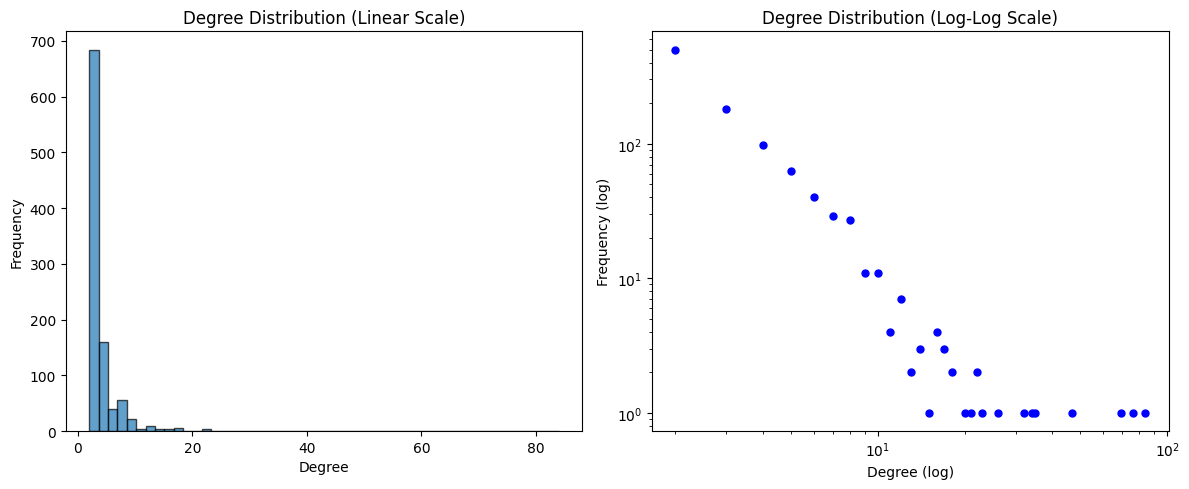

In [4]:
# Visualizing Degree Distribution (Core of Scale-Free Property)
degrees = [d for n, d in G.degree()]

plt.figure(figsize=(12, 5))

# Linear Scale
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=50, edgecolor='black', alpha=0.7)
plt.title("Degree Distribution (Linear Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Log-Log Scale
plt.subplot(1, 2, 2)
# Calculate frequency count
degree_freq = nx.degree_histogram(G)
degrees_vals = range(len(degree_freq))
# Filter zeros for log plot
x = [d for d in degrees_vals if degree_freq[d] > 0]
y = [degree_freq[d] for d in degrees_vals if degree_freq[d] > 0]

plt.loglog(x, y, 'bo', markersize=5)
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")

plt.tight_layout()
plt.show()


In [5]:
# Comparison with Random Graph (ER) for Clustering
# An ER graph with same N and similar average degree
avg_degree = 2 * G.number_of_edges() / N
p_equiv = avg_degree / (N - 1)
G_er = nx.erdos_renyi_graph(N, p_equiv, seed=42)

print(f"\nComparing Clustering Coefficient:")
print(f"BA Scale-Free: {avg_clustering:.4f}")
print(f"ER Random: {nx.average_clustering(G_er):.4f}")
print("Scale-free networks typically have higher clustering than random graphs of same sparsity, though small-world is "
      "better known for high clustering.") 
# Note: BA clustering is actually often low, decreasing with N, but higher than ER for large N in limit distributions.
# Small world (WS) maximizes clustering.



Comparing Clustering Coefficient:
BA Scale-Free: 0.0307
ER Random: 0.0059
Scale-free networks typically have higher clustering than random graphs of same sparsity, though small-world is better known for high clustering.


**Observation and Conclusion**:
1. **Power Law**: The log-log plot of the degree distribution shows a linear negative slope, characteristic of a Power Law. A few "hubs" have very high degree, while most nodes have low degree.
2. **Preferential Attachment**: The mechanism leads to the emergence of hubs.
3. **Path Length**: Scale-free networks are "ultra-small" worlds; the path lengths are short.
